In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


### Creating data to view and fit

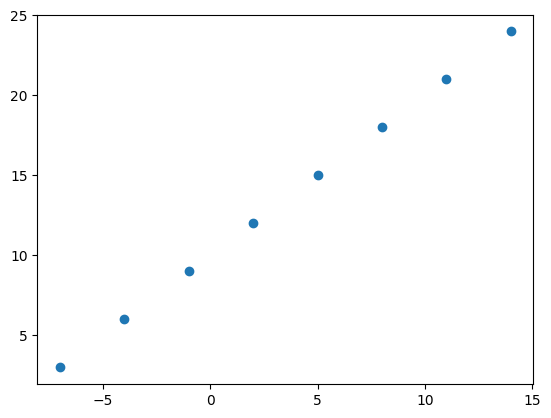

In [13]:
X = tf.constant([-7.0, -4.0, -1.0,  2.0,  5.0,  8.0, 11.0, 14.0])
y = tf.constant([ 3.0,  6.0,  9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

In [14]:
y==X+10 #the relation

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

### Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

In [15]:
# Example input and output shapes of a housing price regression model
infos=tf.constant(["rooms","garage","bethroom"])#shape=3
price=tf.constant([1000000])#shape=1
infos,price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'rooms', b'garage', b'bethroom'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1000000], dtype=int32)>)

In [16]:
X[0].shape , X.shape

(TensorShape([]), TensorShape([8]))

The whole dataset has shape (8,) → 8 numbers.

But a single example from it has shape () → just one number.

📌 Why this matters:
When you build a neural network, you must tell it the shape of a single example, not the whole dataset. That’s called the input shape of the model.



## Your first model : 
In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
Fitting a model - letting the model try to find patterns in the data (how does X get to y).


In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)]
)
model.compile(loss=tf.keras.losses.mae ,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X,axis=1),y,epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step - loss: 10.7307 - mae: 10.7307
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 10.5982 - mae: 10.5982
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 10.4657 - mae: 10.4657
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 10.3332 - mae: 10.3332
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 10.2007 - mae: 10.2007


Sequential: This creates a linear stack of layers (one after another)
Dense(1): This is a fully connected layer with just 1 neuron
Dense layers connect every input to every output
With 1 neuron, this model will output a single number (like predicting a price, temperature, etc.)

What is a Dense Layer?
Think of a Dense layer like a connection hub where every input connects to every output.
Input Features:    Dense Layer (1 neuron):    Output:
[house_size]  ──────┐
                    │
[bedrooms]    ──────┼────── [neuron] ────── [predicted_price]
                    │
[location]    ──────┘
How it Works:

Every input connects to the neuron: All 3 features connect to that 1 neuron
The neuron does math: It multiplies each input by a weight and adds them up
neuron_output = (house_size × weight1) + (bedrooms × weight2) + (location × weight3) + bias

Produces 1 output: Since there's only 1 neuron, you get 1 prediction

Why "Fully Connected"?

Fully connected = every input touches every neuron
If you had 2 neurons, each input would connect to BOTH neurons

-------------------------------------------------------------------------------------------------------
loss: How the model measures how "wrong" it is

MAE (Mean Absolute Error): Takes the average of absolute differences between predictions and actual values
Example: if actual=10 and prediction=7, error = |10-7| = 3

optimizer: How the model learns and improves

SGD (Stochastic Gradient Descent): A basic learning algorithm that adjusts the model's weights to reduce the loss

metrics: What to track during training (here, also MAE for monitoring)

--------------------------------------------------------------------------------------------------

tf.expand_dims(X, axis=-1): This reshapes your input data

If X was shape (100,) → becomes (100, 1)
Neural networks expect 2D input: (samples, features)
The -1 means "add dimension at the end"

epochs=5: The model will see the entire dataset 5 times

Each epoch = one complete pass through all your training data

This is a simple linear regression model that learns to map input X to output y with a straight line relationship!

In [25]:
#let's try the model
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [40]:
pr=model.predict(tf.expand_dims([16],axis=1))
pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[15.509592]], dtype=float32)

In [ ]:
#15!?, thats wrong, lets step back and see the last value of loss (10.2007)
pr+10.2007 #25.71 = almost 26 /its not always representive thought

array([[25.710293]], dtype=float32)

### Improving our model 
To improve our model, we alter almost every part of the 3 steps we went through before.

Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [46]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 50 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #Remember that potantially Lr is the most important hyper parameter on all of your neural network
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.4688 - mae: 12.4688
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 11.8292 - mae: 11.8292
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 11.1837 - mae: 11.1837
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 10.5291 - mae: 10.5291
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 9.8627 - mae: 9.8627
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 9.1822 - mae: 9.1822
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 8.4849 - mae: 8.4849
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 7.7681 - mae: 7.7681
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 7.0291 - mae: 7.0291
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 6.8361 - mae: 6.8361
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 7.2047 - mae: 7.2047
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 7.4804 - mae: 7.4804
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
pr=model.predict(tf.expand_dims([16],axis=1))
pr #its now better!!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[26.6626]], dtype=float32)